In [2]:
import re
from pandas import Series, DataFrame
import pandas as pd
import matplotlib

df = pd.read_csv("NYC_Restaurants.csv", dtype=unicode)

%matplotlib inline

# Q1
-Created a unique name by combining strings in each column

In [3]:
df['RESTAURANT'] = df['DBA']+df['BUILDING']+df['STREET']+df['ZIPCODE']
df.loc[:9, 'RESTAURANT']

0                       WENDY'S469FLATBUSH AVENUE11225
1                       WENDY'S469FLATBUSH AVENUE11225
2                       WENDY'S469FLATBUSH AVENUE11225
3                       WENDY'S469FLATBUSH AVENUE11225
4                       WENDY'S469FLATBUSH AVENUE11225
5                  TOV KOSHER KITCHEN97-2263 ROAD11374
6                  TOV KOSHER KITCHEN97-2263 ROAD11374
7                  TOV KOSHER KITCHEN97-2263 ROAD11374
8                  TOV KOSHER KITCHEN97-2263 ROAD11374
9    BRUNOS ON THE BOULEVARD8825ASTORIA BOULEVARD11369
Name: RESTAURANT, dtype: object

# Q2
-Created a unique identifier column called Key, and then dropped duplicate entries based on the Key column

-Key was created using the columns listed in the instructions

-Reset the index as a best practice

-Length of the unique restaurants is the # of restaurants

In [4]:
#Find a unique identifier & aggregate
df['Key'] = df['DBA'] + df['BORO'] + df['BUILDING'] + df['STREET'] + df['ZIPCODE']

df_unique = df[['DBA', 'Key']].drop_duplicates()
df_unique = df_unique.reset_index()

print len(df_unique)

10114


# Q3
-First create a Chain Key Column so that we are desinating a chain as 2+ restaurants with the same name,
and different building, street, & zip code

-Find the list of unique restaurant names

-For each name in that unique list, filter/mask by each unique name

-If the count of Chain Keys > 1, then we know its a chain, so put it in a new dictionary

-Else put it in the not chain dictionary

In [5]:
dba_dict = {}
dba_not_chain = {}

df['Chain_Key'] = df['BUILDING'] + df['STREET'] + df['ZIPCODE']


df_unique = df[['DBA', 'Chain_Key']].drop_duplicates()
df_unique = df_unique.reset_index()



unique_names = df_unique['DBA'].unique()

for name in unique_names:
    mask = df_unique['DBA'] == name
    df_filter = df_unique[mask]
    
    cvc = df_filter['Chain_Key'].value_counts()
    
    if len(cvc) >1:
        dba_dict[name] = len(cvc)
    else:
        dba_not_chain[name] = 1
        
len(dba_dict.items())

368

# Q4
-Sort the chain restaurants in descending order of values & plot the top 20

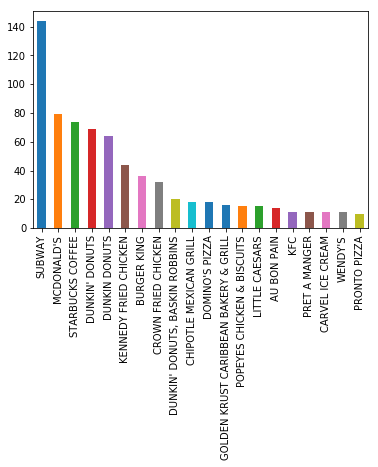

In [6]:
# Please run this twice. Graph shows up the second time. 



sorted_dba_series = Series(dba_dict)
a = sorted_dba_series.sort_values(ascending = False)
a[0:20].plot(kind='bar')

# Q5
-Go line by line (iterrows) and check to see if the Restaurant name (DBA) is in the previous dictionary of Chain 
restaurants that we created in Q3.

-If yes, then count it (counter +=1)

-Fraction is the counter / # total unique restaurants

In [9]:
counter = 0
for index, row in df_unique.iterrows():
    if df_unique.loc[index, 'DBA'] in dba_dict.keys():
        counter +=1

fraction = float(counter) / len(df_unique)
fraction

0.16472216729286138

# Q6
-Iterate through the df of unique restaurants

-If not in the series/dictionary of chains, then they are not chains

-Get the Boro info for each of these instances and place in boro_dict if NOT Missing

-Then plot

{'BRONX': 659, 'BROOKLYN': 2180, 'STATEN ISLAND': 312, 'MANHATTAN': 3323, 'QUEENS': 1968}


,index,DBA,Key,BORO
0,0,WENDY'S,WENDY'SBROOKLYN469FLATBUSH AVENUE11225,BROOKLYN
1,5,TOV KOSHER KITCHEN,TOV KOSHER KITCHENQUEENS97-2263 ROAD11374,QUEENS
2,9,BRUNOS ON THE BOULEVARD,BRUNOS ON THE BOULEVARDQUEENS8825ASTORIA BOULE...,QUEENS
3,16,MAY MAY KITCHEN,MAY MAY KITCHENBROOKLYN1269SUTTER AVENUE11208,BROOKLYN
4,22,SEUDA FOODS,SEUDA FOODSBROOKLYN705KINGS HIGHWAY11223,BROOKLYN
5,24,CARVEL ICE CREAM,CARVEL ICE CREAMBROOKLYN203CHURCH AVENUE11218,BROOKLYN
6,26,NORDIC DELICACIES,NORDIC DELICACIESBROOKLYN69093 AVENUE11209,BROOKLYN
7,30,GLORIOUS FOOD,GLORIOUS FOODMANHATTAN522EAST 74 STREET10021,MANHATTAN
8,31,THE MOVABLE FEAST,THE MOVABLE FEASTBROOKLYN284PROSPECT PARK WEST...,BROOKLYN
9,34,BULLY'S DELI,BULLY'S DELIMANHATTAN759BROADWAY10003,MANHATTAN


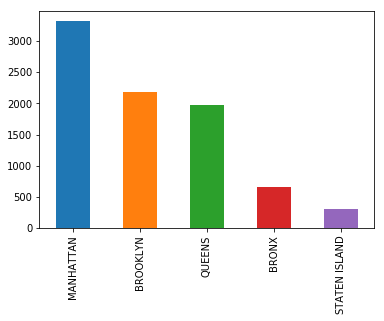

In [10]:
boro_dict = {}

df_unique = df[['DBA', 'Key', 'BORO']].drop_duplicates()
#reset indices
df_unique =df_unique.reset_index()


for r in range(len(df_unique)):
    #if r is not in restaurant list of chains
    if df_unique.loc[r, 'DBA'] not in sorted_dba_series:
        boro = df_unique.loc[r, 'BORO']
        
        if boro != 'Missing':
            if boro in boro_dict.keys():
                boro_dict[boro]+=1
            else:
                boro_dict[boro]=1

print boro_dict


boro_dict_series = Series(boro_dict)
b = boro_dict_series.sort_values(ascending = False)
b.plot(kind='bar')

df_unique

# Q7
-Count the total restaurants in each boro = boro_vc

-Loop through the series of non_chain restaurants creatd in Q6 & match to boro name in boro_vc series

-Do the math & store in new dictionary boro_fractio_dict, then Plot

{'BRONX': 0.7707602339181286, 'BROOKLYN': 0.8620007908264136, 'STATEN ISLAND': 0.7918781725888325, 'MANHATTAN': 0.8305423644088977, 'QUEENS': 0.8479103834554071}


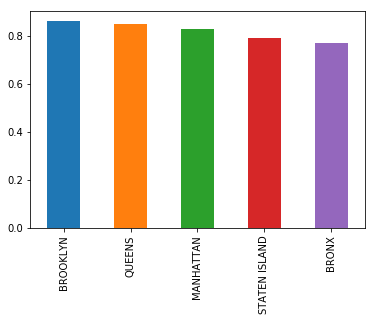

In [8]:
boro_fraction_dict = {}

# need value count for each boro
boro_vc = df_unique['BORO'].value_counts()

for x in range(len(boro_dict_series)):
    for y in range(len(boro_vc)):
        if boro_dict_series.index.values[x] == boro_vc.index.values[y]:
            boro_fraction_dict[boro_dict_series.index.values[x]] = float(boro_dict_series[x]) / boro_vc[y]

print boro_fraction_dict


boro_fraction_dict_series = Series(boro_fraction_dict)
c = boro_fraction_dict_series.sort_values(ascending = False)
c.plot(kind='bar')

#answer to the question
#Brooklyn has the highest fraction of non-chain restaurants @ 87.9%, but 

# Q8
-Get the unique list of cuisines, mask on each cuisine, created new dictionary where cuis_dict[cuis] = #times that cuisine exists, then plot

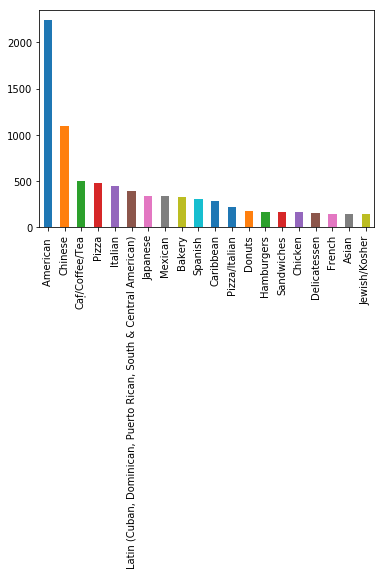

In [9]:
df_unique = df[['DBA', 'Key', 'BORO', 'CUISINE DESCRIPTION']].drop_duplicates()
df_unique = df_unique.reset_index()


counter = 0
cuis_dict = {}

cuis_names = df_unique['CUISINE DESCRIPTION'].unique()

for cuis in cuis_names:
    mask = df_unique['CUISINE DESCRIPTION'] == cuis
    cuis_filter = df_unique[mask]
    
    cuis_vc = cuis_filter['Key'].value_counts()
    cuis_dict[cuis] = len(cuis_vc)

cuis_dict_series = Series(cuis_dict)
d = cuis_dict_series.sort_values(ascending = False)
d[0:20].plot(kind='bar')

# Q9
-Create a new unique df with all unique inspections

-Mask for each restaurant & sum the # of non-null violation codes

-If this # = 0, then its classified as a clean restaurant bc it never received a violation

-Store all clean restaurants in clean_food as key: cuisine description

-Next use clean_cuisine to create a series of cuisine: # clean restaurants

-So for each cuisine type and each store in the list of clean restaurants

    -If the cuisine is found in the list add to the counter clean_cuisine[cuis]+=1, and plot

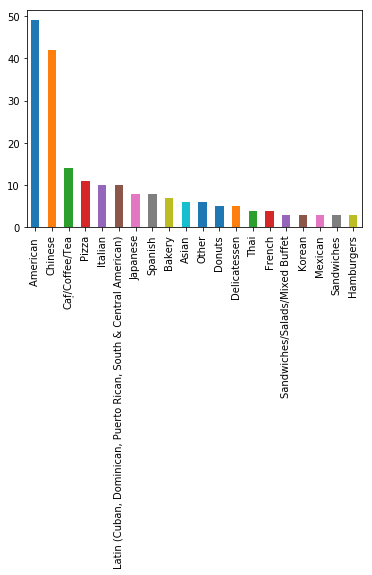

In [10]:
clean_food = {}
violations = {}
violation_counter = 0
counter = 0

df_unique = df[['DBA', 'Key', 'INSPECTION DATE', 'CUISINE DESCRIPTION', 'VIOLATION CODE']].drop_duplicates()
df_unique = df_unique.reset_index()




for cuis in df_unique['Key'].unique():
    df_clean = df_unique[df_unique['Key'] == cuis] #masking for each individual restaurant

    violation_counter = sum(df_clean['VIOLATION CODE'].notnull()) #masking for restaurant, left with all inspections

    if violation_counter == 0:
           clean_food[df_clean.iloc[0]['Key']] = df_clean.iloc[0]['CUISINE DESCRIPTION']

clean_food 


clean_cuisine = {}
clean_food_series = Series(clean_food)


for cuisine in clean_food_series.unique():
    for store in clean_food.keys():
        if clean_food[store] == cuisine:
            if cuisine in clean_cuisine.keys():
                clean_cuisine[cuisine] += 1
            else: clean_cuisine[cuisine] = 1
        
clean_cuisine

clean_cuisine_series = Series(clean_cuisine)
e = clean_cuisine_series.sort_values(ascending = False)
e[0:20].plot(kind='bar')



# Q10
-For every restaurant in cuisine dictionary, if its in the clean dictionary & there's >20, add an entry to the clean fraction dictionary, then plot

In [11]:
clean_fraction = {}

for i in cuis_dict.keys():
    if i in clean_cuisine.keys():
        if cuis_dict[i] >= 20:
            clean_fraction[i] = float(clean_cuisine[i])/cuis_dict[i] 
    else: clean_fraction[i] = 0

    
clean_fraction_series = Series(clean_fraction)*100
f = clean_fraction_series.sort_values(ascending = False)
f[:10]



Soul Food                        9.090909
Vietnamese/Cambodian/Malaysia    6.250000
Other                            5.825243
Continental                      4.761905
Soups & Sandwiches               4.761905
Barbecue                         4.761905
Asian                            4.109589
Chinese                          3.825137
Greek                            3.636364
Peruvian                         3.571429
dtype: float64

# Q11
-Recreate df to first drop Missing boros

-Use crosstab & idxmax functions to get the most common violations in each boro

In [12]:
df_temp = df[['VIOLATION DESCRIPTION', 'BORO']]
df_temp = df_temp[df_temp['BORO']!='Missing']

        
df_cross = pd.crosstab(df_temp['VIOLATION DESCRIPTION'], df_temp['BORO'])
df_cross.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

# Q12
-First get overall frequencies by counting the values in df

-Next create a normalizing function with 3 inputs: the cell, the violation type & df_ViolationFrequency

-Return the cell of the crosstab table,/total freq of that violation type

-Loop matches the boro & violation, then does the math using the function

-print the idxmaxes


In [13]:
#print df_cross.index.values[1]
#print df_cross.index[0]
#print df_cross.values[0]
#df_cross


boros = df_cross.columns

df_violationFrequency = df['VIOLATION DESCRIPTION'].value_counts()

def norm(cell, violationType, df_violationFrequency):
    return float(cell)/df_violationFrequency[violationType]

for col in boros:
    for row in df_cross.index.values:
        df_cross.loc[row, col] = norm(df_cross.loc[row, col], row, df_violationFrequency)


df_cross.idxmax()

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

# Q13
-Create a function to get the first 3 digits of a phone #

-Create a new column in df with Area Code using the function on the phone # column

-Create a list of the unique area codes

-Mask for each area code, then find the unique list of associated zip codes

-If the len(list) == 1 then theres only 1 asscoaited zip, add it to the dict & count it


In [14]:
AC_dict = {}
counter = 0

def getThree(n):
    return n[:3]

df['AREA CODE'] = df['PHONE'].map(getThree)

#mask for area code, check number of zipcodes
unique_ACs = df['AREA CODE'].unique()

for AC in unique_ACs:
    mask = df['AREA CODE'] == AC
    df_filter_AC = df[mask]
    
    cvc = df_filter_AC['ZIPCODE'].unique()
    
    if len(cvc) == 1:
        AC_dict[AC] = cvc
        counter +=1
 
counter

34

# Q14
-Create a function to split the street name, take the last word
-Create a function to split the street name, take all elements but the last, and add string together

-Create new columns in df for street type, street base, and street base & zip

-Create a df to have all unqiue values of street type, base and base & zip
-Remove any instance of missing street base
-Merge the df onto itself on the Street base & zip columns
-Overwrite the df so that only entries where street type a != street type b
-Create a crosstab, return the idxmax on certain street types given by the instructions

In [15]:
def lastWord(n):
    return n.split()[-1]


def baseWord(n):
    base = ""
    x = n.split()[:-1]
    for i in range(len(x)):
        base = base + " " + x[i]
    return base


df['STREET TYPE'] = df['STREET'].map(lastWord)
df['STREET BASE'] = df['STREET'].map(baseWord)
df['STREET BASE & ZIP'] = df['STREET BASE'] + df['ZIPCODE']

df_lastProblem = df[['STREET TYPE', 'STREET BASE', 'STREET BASE & ZIP']].drop_duplicates()


######  ASK  ABOUT   REMOVING  BROADWAY ##############

df_lastProblem = df_lastProblem[df_lastProblem['STREET BASE'] != ""]

df_lastProblem_merged = df_lastProblem.merge(df_lastProblem, left_on='STREET BASE & ZIP', 
                                             right_on='STREET BASE & ZIP', suffixes=['_a', '_b'])


df_lastProblem_merged= df_lastProblem_merged[df_lastProblem_merged['STREET TYPE_a'] != df_lastProblem_merged['STREET TYPE_b']]


df_cross = pd.crosstab(df_lastProblem_merged['STREET TYPE_a'], df_lastProblem_merged['STREET TYPE_b'])
df_cross


df_cross[['AVE', 'ST', 'RD', 'PL', 'BOULEARD','BULEVARD']].idxmax()

STREET TYPE_b
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object